## 💪 Challenge
Using either Tableau or Power BI, create an interactive dashboard to summarize your research. Things to consider:

1. Use this Workspace to prepare your data (optional).
2. Some ideas to get you started: visualize how shipments are delayed, by country, product, and over time. Analyze products by their supply versus demand ratio. Rank products by over or understock. Don't feel limited by these, you're encouraged to use your skills to consolidate as much information as possible. 
3. Create a screenshot of your (main) Tableau or Power BI dashboard, and paste that into the designated field.
4. Summarize your findings in an executive summary.

In [8]:
import pandas as pd
data = pd.read_csv("data/orders_and_shipments.csv", encoding = 'UTF-8')
#Lets see the columns and how they appear 

data.sample(n=25)




,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
28491,35236,88001,201605,2016,5,29,08:23,1,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,3987,North America,US Center,USA,Puerto Rico,2016,5,31,Second Class,2,60,0.03,147
26595,33901,84623,201601,2016,1,27,14:20,3,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,6487,North America,East of USA,USA,Puerto Rico,2015,9,14,First Class,1,300,0.12,245
16944,2785,6994,201502,2015,2,11,21:29,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1775,LATAM,Central America,Honduras,USA,2015,2,11,Same Day,3,400,0.18,200
24003,5926,14744,201602,2016,2,29,12:22,4,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,8807,LATAM,Caribbean,Cuba,Puerto Rico,2016,3,3,Standard Class,4,160,0.1,97
24414,31661,79125,201604,2016,4,7,03:54,2,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,5710,North America,East of USA,USA,Puerto Rico,2016,4,9,First Class,1,100,0.12,125
21443,2721,6811,201703,2017,3,1,23:46,2,Outdoors,Golf Balls,Glove It Women's Imperial Golf Glove,5655,LATAM,South America,Brazil,USA,2017,3,4,Same Day,3,40,0.13,44
4915,45281,113142,201703,2017,3,16,10:36,4,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,10288,Europe,Southern Europe,Bosnia and Herzegovina,USA,2017,5,26,Standard Class,4,400,0.01,245
27100,5791,14417,201503,2015,3,26,12:29,5,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,1897,LATAM,Central America,Guatemala,Puerto Rico,2015,3,28,Standard Class,4,250,0.15,125
24662,9533,23821,201505,2015,5,20,03:29,4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,7685,LATAM,Central America,Guatemala,Puerto Rico,2015,5,24,Standard Class,4,200,0.17,125
12845,45896,114718,201610,2016,10,31,23:03,2,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,345,Africa,North Africa,Morocco,USA,2016,10,31,Standard Class,4,100,0.12,125


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Order ID                     30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

**We have some issues with the columns names, lets take a look and fix these.**

In [10]:

data.columns = data.columns.str.replace(" ",'')
data.columns = data.columns.str.lower()
data.columns


Index(['orderid', 'orderitemid', 'orderyearmonth', 'orderyear', 'ordermonth',
       'orderday', 'ordertime', 'orderquantity', 'productdepartment',
       'productcategory', 'productname', 'customerid', 'customermarket',
       'customerregion', 'customercountry', 'warehousecountry', 'shipmentyear',
       'shipmentmonth', 'shipmentday', 'shipmentmode',
       'shipmentdays-scheduled', 'grosssales', 'discount%', 'profit'],
      dtype='object')

**Lets get the date of order all together in one column and do the same with the shipment and brig them all to datetime**

In [11]:
import datetime as dt
 

data = data.rename(columns={'orderyear':'year','ordermonth':'month','orderday':'day'})
data['order_date'] = pd.to_datetime(data[['year','month','day']])
data['order_date'] = data['order_date'].dt.strftime("%Y-%m-%d")


data = data.rename(columns={'shipmentyear':'Year','shipmentmonth':'Month','shipmentday':'Day'})
data['shipment_date'] = pd.to_datetime(data[['Year','Month','Day']])
data['shipment_date'] = data['shipment_date'].dt.strftime("%Y-%m-%d")

data['shipment_date'] = pd.to_datetime(data['shipment_date'])
data['order_date'] = pd.to_datetime(data['order_date'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   orderid                 30871 non-null  int64         
 1   orderitemid             30871 non-null  int64         
 2   orderyearmonth          30871 non-null  int64         
 3   year                    30871 non-null  int64         
 4   month                   30871 non-null  int64         
 5   day                     30871 non-null  int64         
 6   ordertime               30871 non-null  object        
 7   orderquantity           30871 non-null  int64         
 8   productdepartment       30871 non-null  object        
 9   productcategory         30871 non-null  object        
 10  productname             30871 non-null  object        
 11  customerid              30871 non-null  int64         
 12  customermarket          30871 non-null  object

,orderid,orderitemid,orderyearmonth,year,month,day,ordertime,orderquantity,productdepartment,productcategory,productname,customerid,customermarket,customerregion,customercountry,warehousecountry,Year,Month,Day,shipmentmode,shipmentdays-scheduled,grosssales,discount%,profit,order_date,shipment_date
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,LATAM,Central America,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,LATAM,South America,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,LATAM,Central America,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12


**Another column we have to modify the type is the discount, we have a ' - ' record in this columns that means the purchase had no discount, so lets replace it to zero (0)**

In [12]:
data['discount%'].unique()
data['discount%'] = data['discount%'].str.replace('  -  ', '0')
data['discount%'] = data['discount%'].astype('float')

# Now we'll check if there is any register anomalous

data.describe()

,orderid,orderitemid,orderyearmonth,year,month,day,orderquantity,customerid,Year,Month,Day,shipmentdays-scheduled,grosssales,discount%,profit
count,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000
mean,35818.833792,89380.257361,201601.137411,2015.948657,6.271679,15.735026,2.149817,6477.672152,2015.955427,6.299569,15.978005,3.072495,200.235690,0.101296,129.383305
std,20623.809444,51279.388574,79.438616,0.796323,3.373914,8.484049,1.461393,3932.830830,0.798863,3.360191,8.582789,1.184417,114.251482,0.070423,52.649857
min,11.000000,29.000000,201501.000000,2015.000000,1.000000,1.000000,1.000000,2.000000,2015.000000,1.000000,1.000000,1.000000,10.000000,0.000000,6.000000
25%,17905.000000,44721.500000,201509.000000,2015.000000,3.000000,9.000000,1.000000,3177.000000,2015.000000,3.000000,9.000000,2.000000,120.000000,0.040000,97.000000
50%,35886.000000,89624.000000,201606.000000,2016.000000,6.000000,16.000000,1.000000,6355.000000,2016.000000,6.000000,16.000000,4.000000,200.000000,0.090000,125.000000
75%,53507.000000,133710.500000,201702.000000,2017.000000,9.000000,23.000000,3.000000,9577.000000,2017.000000,9.000000,23.000000,4.000000,300.000000,0.160000,150.000000
max,77095.000000,180410.000000,201712.000000,2017.000000,12.000000,31.000000,5.000000,20648.000000,2017.000000,12.000000,31.000000,4.000000,533.000000,0.250000,258.000000


**We're going to create a column with values 0 and 1. 1 meaning that the shipment arrived whitin the scheduled time. 0 meaning that it was delayed**
**First let's create a new column named 'days' with the values of time in days that has taken to arrive the product**

In [13]:
# Check if there is any NaN value
data.isna().sum()

data['days'] = (data['shipment_date'] - data['order_date']).dt.days

#Now we create the check with values 0-1

data['on_time'] = 100
a = -1
for (i,j) in zip(data['days'], data['shipmentdays-scheduled']):
    a = a +1 
    if j >= i:
        data['on_time'][a] = 1
    elif j < i:
        data['on_time'][a] = 0
        
data.sample(n=50)

# In the days columns we can see that are some issues, the shipment_date cannot be sooner than the order_date. So, we should look into it to analyze better 

(data.loc[data['days'] < 0].shape[0])/(data.shape[0])*100

# We have 2735 rows with this error. Or 8.86% of the total dataset. 

data.loc[data['days'] < 0]['customerid'].nunique()
data.loc[data['days'] < 0]['productdepartment'].nunique()
data.loc[data['days'] < 0]['orderquantity'].nunique()
data.loc[data['days'] < 0]['shipment_date'].nunique()
data.loc[data['days'] < 0]['order_date'].nunique()

#Is not possible to see a pattern in the error to adjust, so we're going to drop these rows in order to get the most trustful info.

data_cleaned = data.loc[~data['days'] < 0]
data_cleaned.sample(n=20)

,orderid,orderitemid,orderyearmonth,year,month,day,ordertime,orderquantity,productdepartment,productcategory,productname,customerid,customermarket,customerregion,customercountry,warehousecountry,Year,Month,Day,shipmentmode,shipmentdays-scheduled,grosssales,discount%,profit,order_date,shipment_date,days,on_time
822,49558,123850,201612,2016,12,24,10:01,1,Apparel,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,8378,Africa,West Africa,Togo,Puerto Rico,2016,12,28,Standard Class,4,130,0.05,65,2016-12-24,2016-12-28,4,1
4649,13236,33117,201507,2015,7,13,04:48,2,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,532,Europe,Western Europe,Germany,USA,2015,7,28,Standard Class,4,80,0.10,97,2015-07-13,2015-07-28,15,0
5607,13881,34762,201507,2015,7,22,14:46,4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,5646,Europe,Northern Europe,United Kingdom,USA,2015,7,24,Second Class,2,200,0.25,125,2015-07-22,2015-07-24,2,1
19180,43825,109461,201610,2016,10,2,14:10,1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,10514,Europe,Eastern Europe,Ukraine,USA,2016,10,7,Second Class,2,300,0.12,150,2016-10-02,2016-10-07,5,0
11395,19606,49023,201504,2015,4,1,14:56,4,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,4514,Europe,Southern Europe,Italy,USA,2015,4,6,First Class,1,160,0.15,97,2015-04-01,2015-04-06,5,0
4187,17556,43901,201509,2015,9,14,06:17,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,4116,Europe,Western Europe,Germany,USA,2015,9,16,Standard Class,4,400,0.07,200,2015-09-14,2015-09-16,2,1
4658,47816,119568,201611,2016,11,28,23:43,2,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,8316,Europe,Eastern Europe,Russia,USA,2016,12,27,Standard Class,4,80,0.18,97,2016-11-28,2016-12-27,29,0
17230,29373,73486,201603,2016,3,4,18:19,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,2993,Pacific Asia,Oceania,Australia,USA,2016,3,8,Second Class,2,400,0.02,200,2016-03-04,2016-03-08,4,0
22196,23625,59105,201512,2015,12,11,20:32,4,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,141,Pacific Asia,Southeast Asia,Thailand,USA,2015,12,17,Standard Class,4,200,0.06,125,2015-12-11,2015-12-17,6,0
7351,33998,84833,201606,2016,6,24,10:48,1,Apparel,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,3813,North America,South of USA,USA,USA,2016,6,29,Same Day,3,130,0.17,65,2016-06-24,2016-06-29,5,0


**Let's take a look into the inventory dataset**

In [14]:

inventory = pd.read_csv('data/inventory.csv')
inventory.head(n=15)

inventory.shape

(4200, 4)

In [15]:
# First of all, it is good to change the columns names to something more simple
inventory.columns = inventory.columns.str.replace(" ",'')
inventory.columns = inventory.columns.str.lower()
inventory.columns

#Change the type of columns is needed as well

inventory['yearmonth'] = inventory['yearmonth'].astype('str')

# Create a column with the date

inventory['month'] = inventory['yearmonth'].str[-2:]
inventory['year'] = inventory['yearmonth'].str[:-2]
inventory['date'] = inventory['month']+'-'+inventory['year']
inventory['date'] = pd.to_datetime(inventory['date']).dt.strftime("%Y-%m")

inventory.head(10)



,productname,yearmonth,warehouseinventory,inventorycostperunit,month,year,date
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517,12,2017,2017-12
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291,12,2017,2017-12
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531,12,2017,2017-12
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321,12,2017,2017-12
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648,12,2017,2017-12
5,Nike Men's CJ Elite 2 TD Football Cleat,201712,0,0.69591,12,2017,2017-12
6,Field & Stream Sportsman 16 Gun Fire Safe,201712,0,1.39148,12,2017,2017-12
7,Pelican Sunstream 100 Kayak,201712,0,0.20291,12,2017,2017-12
8,Diamondback Women's Serene Classic Comfort Bi,201712,0,1.54601,12,2017,2017-12
9,ENO Atlas Hammock Straps,201712,0,0.48119,12,2017,2017-12


**Loading the fulfillment dataset**

In [16]:

fullfillment = pd.read_csv('data/fulfillment.csv')
fullfillment.head(10)


inventory.info()
data_cleaned.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   productname           4200 non-null   object 
 1   yearmonth             4200 non-null   object 
 2   warehouseinventory    4200 non-null   int64  
 3   inventorycostperunit  4200 non-null   float64
 4   month                 4200 non-null   object 
 5   year                  4200 non-null   object 
 6   date                  4200 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 229.8+ KB


(28136, 28)

**To get insightful informations in the inventory dataset, we'll insert the columns 'productdepartment' and 'productcategory'**


In [17]:

data1 = data_cleaned.groupby(['productname'])['productdepartment'].min()
data2 = data_cleaned.groupby(['productname'])['productcategory'].min()

#turning the groupby into dictionaries so we can use the map function to make a match between the productname and other products infos
name_dept = data1.to_dict()
name_cat = data2.to_dict()

#Using the map function and checking if it worked properly

inventory['productdepartment'] = inventory['productname'].map(name_dept)
inventory['productcategory'] = inventory['productname'].map(name_cat)


**Now we have 3 dataset that are ready for us to work on make analysis and visualizations on PowerBI**

In [18]:

data_cleaned.to_csv('data_cleaned.csv',index = False)
data.to_csv('data.csv', index = False)
inventory.to_csv('inventory.csv', index = False)


**Creating another table called inventory_dept_date, which agregates the warehouseinventory by department, date and product**
**It's going to be import for our analysis**


In [19]:

inventory_dept_date=inventory.groupby(['productdepartment','date','productcategory','productname'
                   ]).agg({'warehouseinventory':'sum','inventorycostperunit':'mean'})
inventory_dept_date = inventory_dept_date.reset_index()
inventory_dept_date


,productdepartment,date,productcategory,productname,warehouseinventory,inventorycostperunit
0,Apparel,2015-01,Cleats,Perfect Fitness Perfect Rip Deck,254,0.49486
1,Apparel,2015-01,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,6,1.00147
2,Apparel,2015-02,Baby,Baby sweater,0,1.62830
3,Apparel,2015-02,Children's Clothing,Children's heaters,0,1.28232
4,Apparel,2015-02,Cleats,Perfect Fitness Perfect Rip Deck,675,0.48195
...,...,...,...,...,...,...
4020,Technology,2017-10,Consumer Electronics,Industrial consumer electronics,5,0.67386
4021,Technology,2017-11,Cameras,Web Camera,5,1.54340
4022,Technology,2017-11,Consumer Electronics,Industrial consumer electronics,0,1.80573
4023,Technology,2017-12,Cameras,Web Camera,0,1.12570


**Making some steps to combine two tables to see the warehouseinventory and the orders at the same period of time, so we can** **compare when we were understocked or overstocked and with which product that happened**

In [20]:


data_product_order = data.copy()
data_product_order['order_date'] = data_product_order['order_date'].dt.strftime("%Y-%m")


data_product_order = data_product_order.groupby(['productdepartment','order_date','productcategory','productname']).agg({'orderquantity':'sum', 'profit':'sum'})
data_product_order.head()

data_product_order = data_product_order.reset_index()


**With the table order_vs_inventory we are able to compare MoM the inventory and orders, so we can monitorate better**
**when happened to be more or less demand than we expected and with what product, category and department**

In [21]:

order_vs_inventory = data_product_order.merge(inventory_dept_date, 
                                             left_on = ['productdepartment','order_date','productcategory','productname'], right_on = ['productdepartment','date','productcategory','productname'],
                                             how = 'outer')


order_vs_inventory['month_of_supply'] = round(order_vs_inventory['warehouseinventory']/order_vs_inventory['orderquantity'] , 2)

order_vs_inventory['month_of_supply'] = order_vs_inventory['month_of_supply'].fillna(1)
order_vs_inventory['inventorycostperunit'] = round(order_vs_inventory['inventorycostperunit'],3)
order_vs_inventory = order_vs_inventory.dropna(subset='order_date')

order_vs_inventory.to_csv('order_vs_inventory.csv', index = False)
order_vs_inventory

,productdepartment,order_date,productcategory,productname,orderquantity,profit,date,warehouseinventory,inventorycostperunit,month_of_supply
0,Apparel,2015-01,Cleats,Perfect Fitness Perfect Rip Deck,456.0,22197.0,2015-01,254,0.495,0.56
1,Apparel,2015-01,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,104.0,6760.0,2015-01,6,1.001,0.06
2,Apparel,2015-02,Cleats,Perfect Fitness Perfect Rip Deck,378.0,17640.0,2015-02,675,0.482,1.79
3,Apparel,2015-02,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,100.0,6500.0,2015-02,108,0.717,1.08
4,Apparel,2015-03,Cleats,Perfect Fitness Perfect Rip Deck,442.0,20580.0,2015-03,542,1.456,1.23
...,...,...,...,...,...,...,...,...,...,...
1689,Technology,2017-09,Cameras,Web Camera,10.0,2190.0,2017-09,15,1.885,1.50
1690,Technology,2017-10,Cameras,Web Camera,129.0,28251.0,2017-10,234,0.888,1.81
1691,Technology,2017-10,Consumer Electronics,Industrial consumer electronics,18.0,2214.0,2017-10,5,0.674,0.28
1692,Technology,2017-11,Cameras,Web Camera,27.0,5913.0,2017-11,5,1.543,0.19


**#With the porpuse to understand better if there's any relationship between number of purchases by each customer**
**and percentage of product they recivied later than expected, we are going to filter and remove from this analysis clients**
**that had been shipped only on time products.**

In [22]:

test = data_cleaned[['customerid','customercountry','on_time','order_date','days']]
test_ontime = test['customerid'].loc[data_cleaned['on_time'] == 1 ] 
test_delay = test['customerid'].loc[data_cleaned['on_time'] == 0] 


test_ontime = test_ontime.to_list()
test_delay = test_delay.to_list()
only_ontime = list(set(test_ontime) - set(test_delay))

clients_no_all_on_time = test.loc[~(test['customerid']).isin(only_ontime) ]
clients_no_all_on_time.sort_values(['customerid','order_date'])





,customerid,customercountry,on_time,order_date,days
21575,2,Honduras,0,2015-07-14,6
22416,2,Honduras,1,2015-12-08,3
19741,2,USA,0,2016-05-09,6
21055,2,USA,0,2016-05-09,6
19342,2,USA,1,2016-10-16,3
...,...,...,...,...,...
28700,20608,India,0,2017-11-22,32
15468,20631,India,0,2017-12-01,10
28885,20634,Indonesia,0,2017-12-15,6
15469,20639,India,0,2017-12-01,14


**# Now lets aggregate by customerid and calculate the percentage of shippments arrived on time and the numbers of**
**purchases each client made.**

In [23]:

corr_ontime_shoptimes = clients_no_all_on_time.groupby('customerid').agg({'on_time':'mean','customercountry':'count','days':'mean'})
corr_ontime_shoptimes = corr_ontime_shoptimes.rename(columns={'customercountry':'buy_times'})
corr_ontime_shoptimes.head()





,on_time,buy_times,days
customerid,,,
2,0.555556,9,4.555556
7,0.500000,2,5.000000
8,0.500000,4,3.500000
11,0.428571,7,62.285714
13,0.600000,5,6.000000


In [24]:
# Transforming on_time column into a percentage type
corr_ontime_shoptimes['on_time'] = corr_ontime_shoptimes['on_time']*100
corr_ontime_shoptimes.head()

,on_time,buy_times,days
customerid,,,
2,55.555556,9,4.555556
7,50.000000,2,5.000000
8,50.000000,4,3.500000
11,42.857143,7,62.285714
13,60.000000,5,6.000000


**#For a better visualization of the relationship between variables, I chose to group the percentage of shipments on time**

**0 - 25 % means a pearson who has recivied on time purchases between 0 and 25% of the time.**

In [25]:
#For a better visualization of the relationship between variables, I chose to group the percentage of shipments on time.
#  0 - 25 % means a pearson who has recivied on time purchases between 0 and 25% of the time.
import numpy as np
ranges = [-1, 25, 50 , 75 , 100]
group_names = ['0 - 25 %', '25 - 50 %', '50 - 75 %', '75 - 100 %']

ranges2 = [-1,10,20,30,40, 50,60,70,80,90,100 , np.inf]
group_names2 = ['0 - 10 days', '10 - 20 days', '20 - 30 days', '30 - 40 days','40 - 50 days','50 - 60 days','60 - 70 days','70 - 80 days','80 - 90 days','90 - 100 days',' 100 + days']


corr_ontime_shoptimes['%_on_time'] = pd.cut(corr_ontime_shoptimes['on_time'], bins=ranges , labels=group_names)
corr_ontime_shoptimes['group_days'] = pd.cut(corr_ontime_shoptimes['days'], bins=ranges2 , labels=group_names2)
corr_ontime_shoptimes.head(10)
corr_ontime_shoptimes.to_csv('ontime_vs_times.csv', index = False)

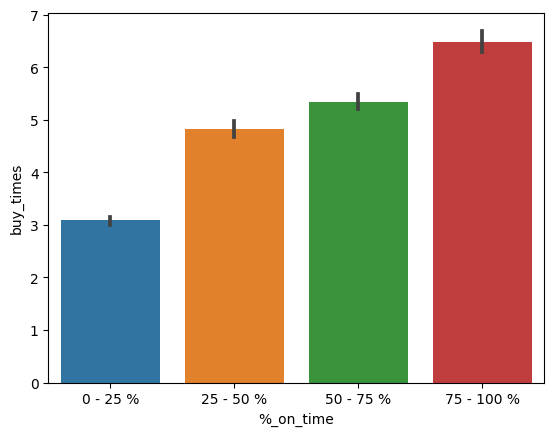

In [26]:
#Lets take a quick look to see if there could be any relation between these variables.

import seaborn as sns
import matplotlib.pyplot as plt


# Basic 2D density plot
sns.barplot(x=corr_ontime_shoptimes['%_on_time'], y=corr_ontime_shoptimes['buy_times'], estimator = 'mean')
plt.show()






**# For an analysis of the days_late's distribution, we're going to create a new column, in which**
**shipments that had no delay we'll be counted as 0.**

In [27]:

data_cleaned['days_late'] = data_cleaned['days'] - data_cleaned['shipmentdays-scheduled']

data_cleaned['days_late'] =data_cleaned['days_late'].replace(-1,0).replace(-2,0).replace(-3,0).replace(-4,0).replace(-5,0)

data_cleaned['days_late'].loc[data_cleaned['Year'] ==2016].value_counts()

inventory['inventory_cost'] = inventory['warehouseinventory']*inventory['inventorycostperunit']

inventory.groupby('year')['inventory_cost'].sum()




 


year
2015    29940.11630
2016    32853.23674
2017    23637.56844
Name: inventory_cost, dtype: float64

**# We now have the goal to understand better the retention of clients, if a clients in 2015 still is in 2017**

In [28]:

customer_2015 = data['customerid'].loc[data['year'] == 2015].drop_duplicates().to_list()
customer_2016 = data['customerid'].loc[data['year'] == 2016].drop_duplicates().to_list()
customer_2017 = data['customerid'].loc[data['year'] == 2017].drop_duplicates().to_list()

continuous_customer_16 =[]
continuous_customer_17 = []
for string1 in customer_2015:
    for string2 in customer_2016:
        if string1 == string2:
            continuous_customer_16.append(string2)
            
for i in continuous_customer_16:
    if i in customer_2017:
        continuous_customer_17.append(i)


len(continuous_customer_17)

funil_clients = [len(customer_2015),len(continuous_customer_16),len(continuous_customer_17)]
funil_clients = {'clients':funil_clients}
funil_clients = pd.DataFrame(funil_clients)
funil_clients['year'] = np.arange(2015,2018)
funil_clients.to_csv('funil_clients.csv')
funil_clients.head()

,clients,year
0,4041,2015
1,2141,2016
2,925,2017


## 🧾 Executive summary
🛑 There is great inefficiency on the order delivering, on average, 52.22% of the orders are not delivered on time. Therefore, using the report dynamically, it is possible to understand that there are forms of delivery with 80% performance (Same Day), while others (First Class) with 3% delivery on time.

🛑 An important indicator in this case is the index that measures how much we are in excess or shortage of stock at the time there is an order confirmation.Not having the product in stock would possibly cause delay in delivery, on the other hand, having too much would cause unnecessary costs. This metric was analyzed monthly and showed a relatively satisfactory performance, with its average at 0.99 and most products circulating around the average. The closer this indicator is to zero, the smaller our inventory in relation to demand, if it is greater than 1 it is a sign that we have more inventory than we need. However the indicator seems to be fine by now, we should monitorate this very carefully.

🛑 In 2017, or profit, inventory and order expenses,decreased approximately 10%. Therefore, analyzing monthly,the profit had been very damaged in responsing the last trimester, there may have been some specific variation (anomaly) in this period that was not reported. Taking this into account, no large oscillations were observed during the years of observation. We could look beter into, since it opens up an opportunity to wonder why I didn't grow up.

🛑 Over the years, although there has not been a clear decrease in shimpent delays (ranging from 52 - 46% of orders out of time), the delays are something to be pretty cautious, the avarage of days in delay for shipments hasn't changed (In 2016 it increased up to 14,53 days) 2015 and 2017 has shown a approximatelly 9 days of delay.

🛑 The report also contains information about the number of times a customer buys related to the percentage of shipments they receive on time. Note that there is a positive correlation between the variables. It showns that is possible we're losing clients due the late shipments we have.

🛑 Finally,in order to have a better understanding of what customer loyalty looks like. When analyzing purchase recurrence, we see that 77% of customers who purchased in 2015 did not do it in 2017. We were able to conclude that there is a capacity to acquire new buyers (Given the stable amount of sales and profit), but not to retain them.

These all insightful informations lead us to a conclusion that we could grow the company and have a better efficiency in shipment, since we have a good status in month supply and a stable inventory cost, the effords of the company should be focused on improving the shipment rates.



## 🌐 Upload your dashboard
![Victor_taouil_supply_competition](Victor_taouil_supply_competition.png)




## ⌛️ Time is ticking. Good luck!
